<a href="https://colab.research.google.com/github/tamim36/Artificial-Intelligence/blob/main/AI-Assignments/AirQualityIndexByLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Quality Index**

# Dataset information

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

# Attribute information

0 Date (DD/MM/YYYY)  
1 Time (HH.MM.SS)  
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)  
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)  
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)  
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)  
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)  
7 True hourly averaged NOx concentration in ppb (reference analyzer)  
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)  
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)  
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)  
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)  
12 Temperature in Â°C  
13 Relative Humidity (%)  
14 AH Absolute Humidity  

Link of the dataset : https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [123]:
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.csv to AirQualityUCI.csv


In [124]:
air_quality = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")

In [125]:
air_quality.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [126]:
air_quality.dropna(axis=0, how= 'all', inplace=True)
air_quality.dropna(axis=1, inplace=True)

In [127]:
air_quality.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [128]:
# here is a data error -200 is append to date. So remove it.
air_quality.replace(to_replace= -200, value= np.NaN, inplace= True)
air_quality

Date      Time  CO(GT)  ...     T    RH      AH
0     10/03/2004  18.00.00     2.6  ...  13.6  48.9  0.7578
1     10/03/2004  19.00.00     2.0  ...  13.3  47.7  0.7255
2     10/03/2004  20.00.00     2.2  ...  11.9  54.0  0.7502
3     10/03/2004  21.00.00     2.2  ...  11.0  60.0  0.7867
4     10/03/2004  22.00.00     1.6  ...  11.2  59.6  0.7888
...          ...       ...     ...  ...   ...   ...     ...
9352  04/04/2005  10.00.00     3.1  ...  21.9  29.3  0.7568
9353  04/04/2005  11.00.00     2.4  ...  24.3  23.7  0.7119
9354  04/04/2005  12.00.00     2.4  ...  26.9  18.3  0.6406
9355  04/04/2005  13.00.00     2.1  ...  28.3  13.5  0.5139
9356  04/04/2005  14.00.00     2.2  ...  28.5  13.1  0.5028

[9357 rows x 15 columns]

In [129]:
air_quality.fillna(air_quality.mean(), inplace= True)

In [130]:
air_quality['Date']

0       10/03/2004
1       10/03/2004
2       10/03/2004
3       10/03/2004
4       10/03/2004
           ...    
9352    04/04/2005
9353    04/04/2005
9354    04/04/2005
9355    04/04/2005
9356    04/04/2005
Name: Date, Length: 9357, dtype: object

In [131]:
air_quality.loc[:,'Date']=air_quality['Date']
air_quality.head()

Date      Time  CO(GT)  PT08.S1(CO)  ...  PT08.S5(O3)     T    RH      AH
0  10/03/2004  18.00.00     2.6       1360.0  ...       1268.0  13.6  48.9  0.7578
1  10/03/2004  19.00.00     2.0       1292.0  ...        972.0  13.3  47.7  0.7255
2  10/03/2004  20.00.00     2.2       1402.0  ...       1074.0  11.9  54.0  0.7502
3  10/03/2004  21.00.00     2.2       1376.0  ...       1203.0  11.0  60.0  0.7867
4  10/03/2004  22.00.00     1.6       1272.0  ...       1110.0  11.2  59.6  0.7888

[5 rows x 15 columns]

In [132]:
from datetime import datetime
Date= []
for i in air_quality['Date']:
    Date.append(datetime.strptime(i,'%d/%m/%Y'))
air_quality.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [133]:
date=pd.Series(Date)
air_quality['Date']=pd.to_numeric(date)

In [134]:
air_quality['Date']=air_quality['Date'].astype(float)
air_quality.dtypes
air_quality

Date      Time  CO(GT)  ...     T    RH      AH
0     1.078877e+18  18.00.00     2.6  ...  13.6  48.9  0.7578
1     1.078877e+18  19.00.00     2.0  ...  13.3  47.7  0.7255
2     1.078877e+18  20.00.00     2.2  ...  11.9  54.0  0.7502
3     1.078877e+18  21.00.00     2.2  ...  11.0  60.0  0.7867
4     1.078877e+18  22.00.00     1.6  ...  11.2  59.6  0.7888
...            ...       ...     ...  ...   ...   ...     ...
9352  1.112573e+18  10.00.00     3.1  ...  21.9  29.3  0.7568
9353  1.112573e+18  11.00.00     2.4  ...  24.3  23.7  0.7119
9354  1.112573e+18  12.00.00     2.4  ...  26.9  18.3  0.6406
9355  1.112573e+18  13.00.00     2.1  ...  28.3  13.5  0.5139
9356  1.112573e+18  14.00.00     2.2  ...  28.5  13.1  0.5028

[9357 rows x 15 columns]

In [135]:
air_quality.loc[:,'Time']=air_quality['Time']

In [136]:
from datetime import datetime
Time= []
for i in air_quality['Time']:
    Time.append(datetime.strptime(i,'%H.%M.%S'))
air_quality.dtypes

Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [137]:
time=pd.Series(Time)
air_quality['Time']=pd.to_numeric(time)

In [138]:
air_quality['Time']=air_quality['Time'].astype(float)
air_quality.dtypes

Date             float64
Time             float64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [139]:
air_quality.tail()

Date          Time  CO(GT)  ...     T    RH      AH
9352  1.112573e+18 -2.208953e+18     3.1  ...  21.9  29.3  0.7568
9353  1.112573e+18 -2.208949e+18     2.4  ...  24.3  23.7  0.7119
9354  1.112573e+18 -2.208946e+18     2.4  ...  26.9  18.3  0.6406
9355  1.112573e+18 -2.208942e+18     2.1  ...  28.3  13.5  0.5139
9356  1.112573e+18 -2.208938e+18     2.2  ...  28.5  13.1  0.5028

[5 rows x 15 columns]

In [140]:
air_quality.shape

(9357, 15)

# **Data visualization**

In [141]:
sns.set_style("whitegrid")

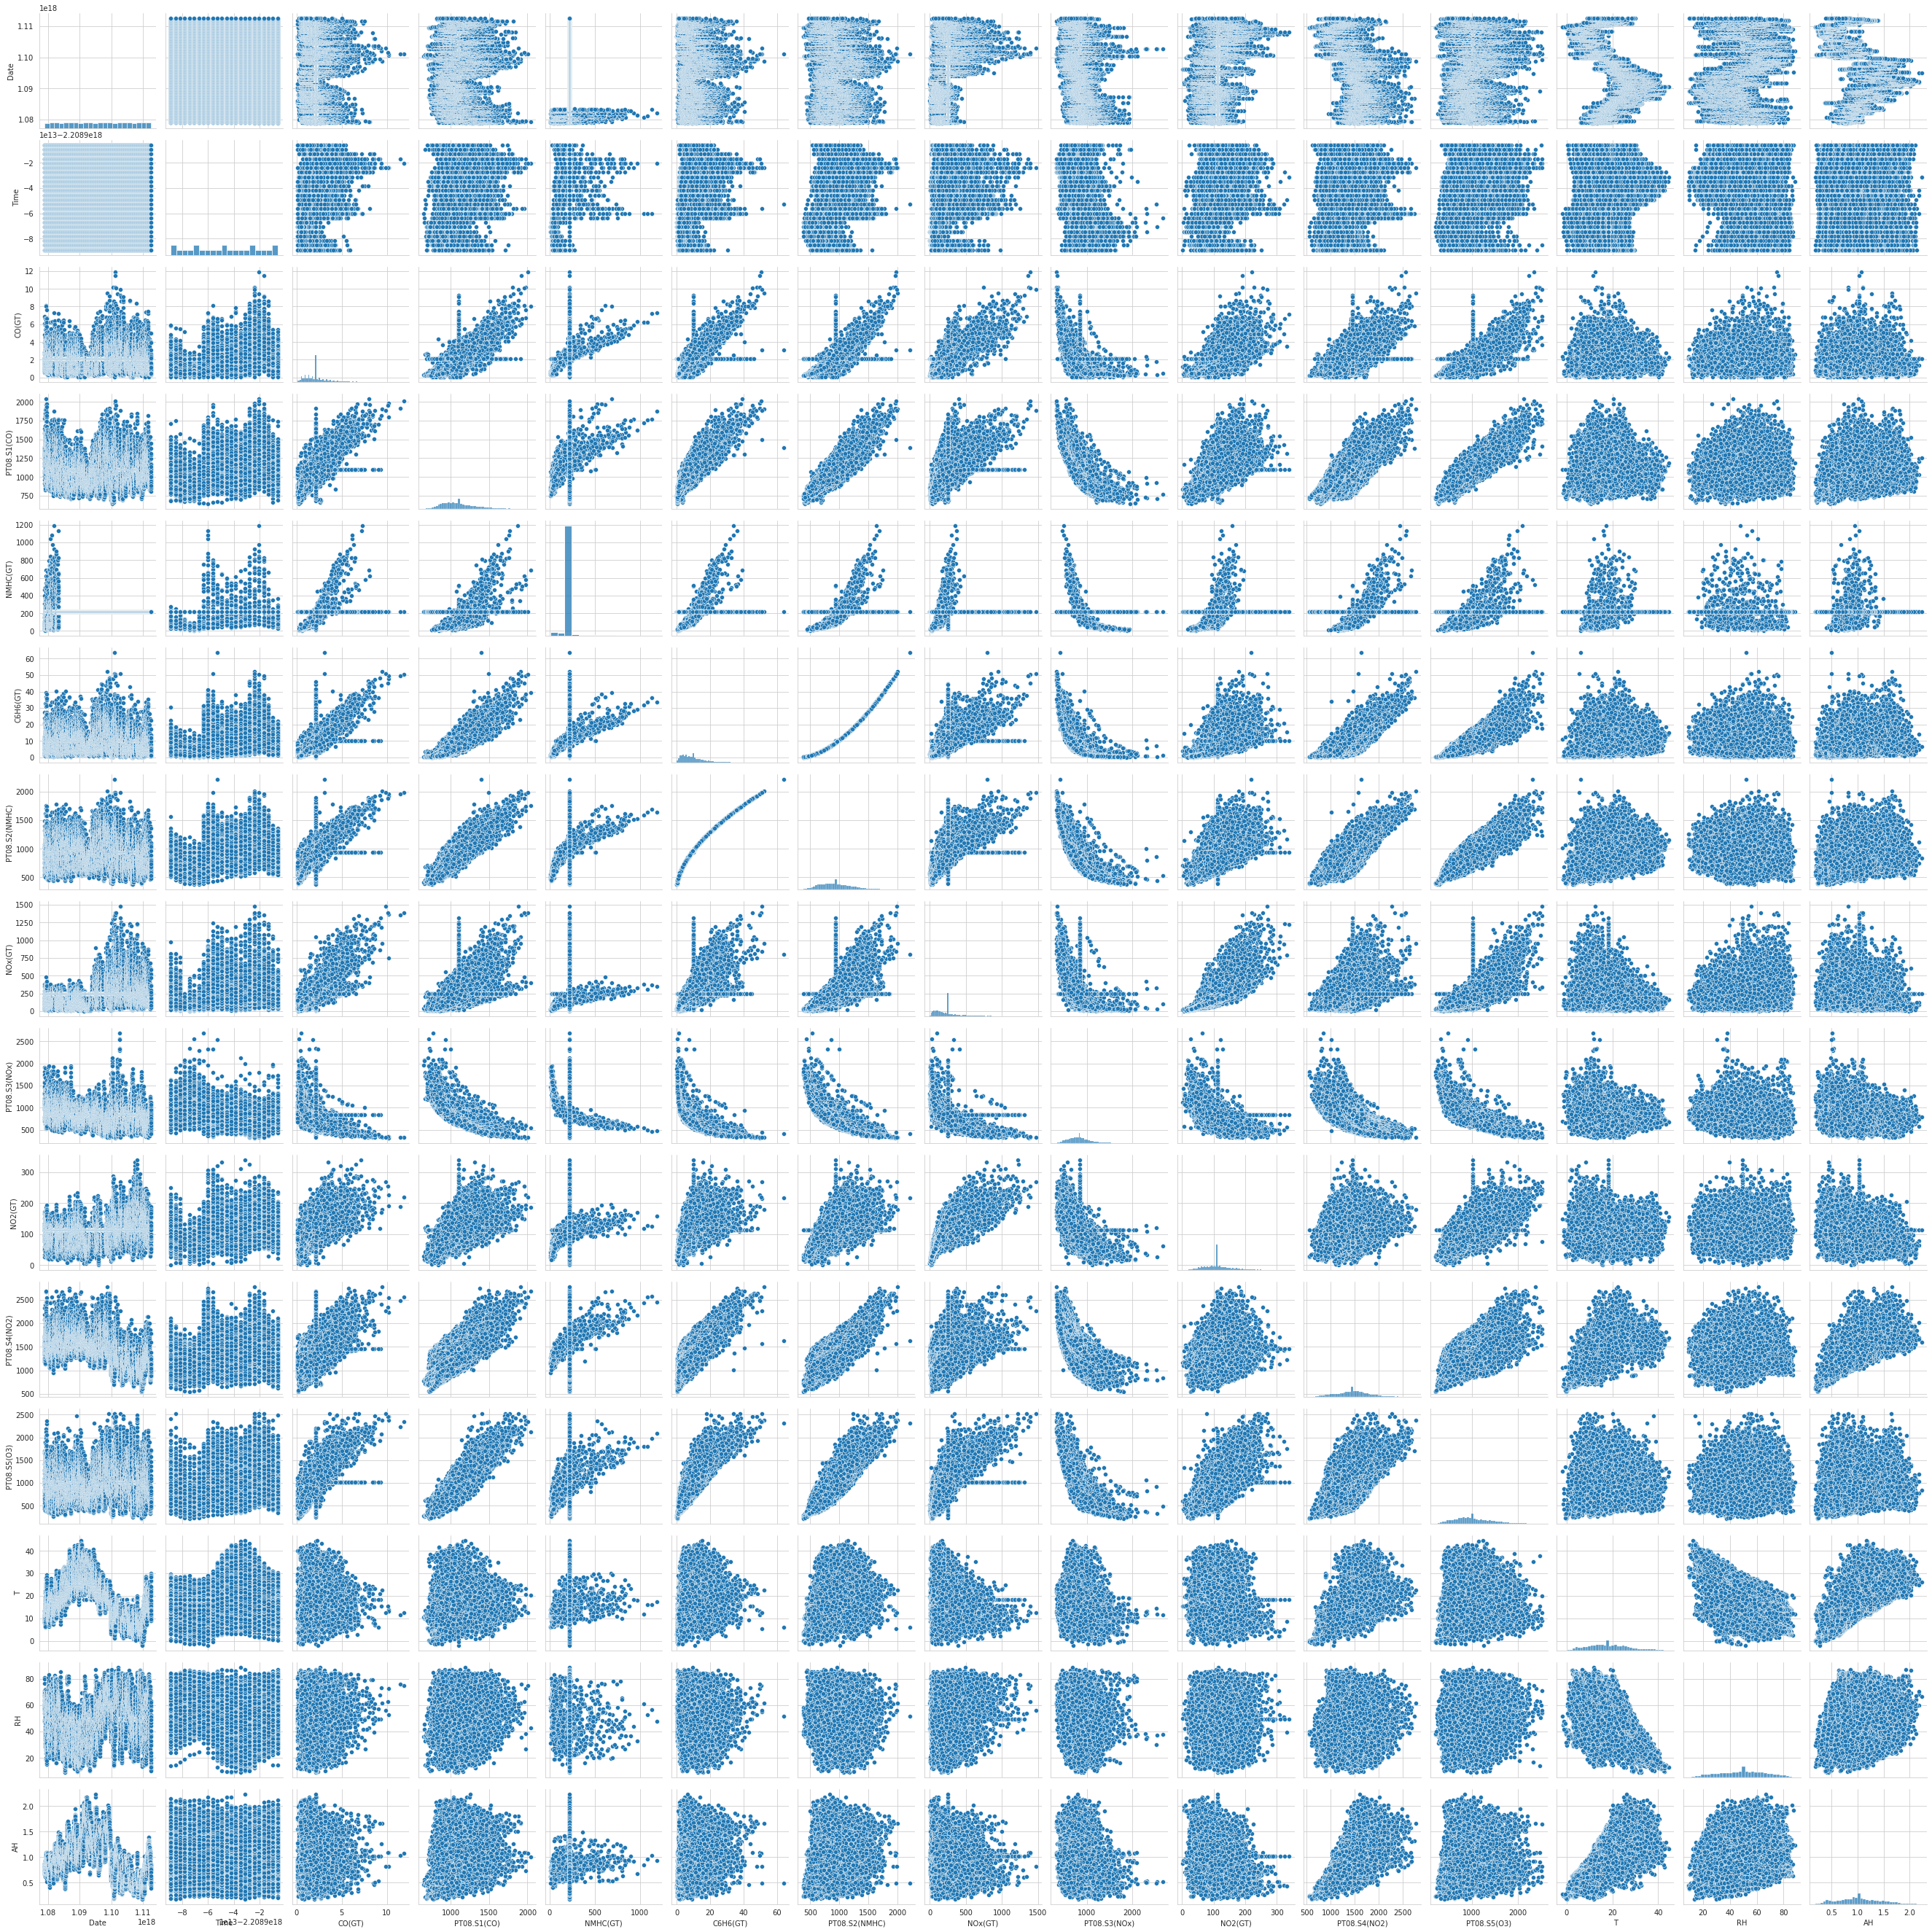

In [142]:
sns.pairplot(air_quality)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

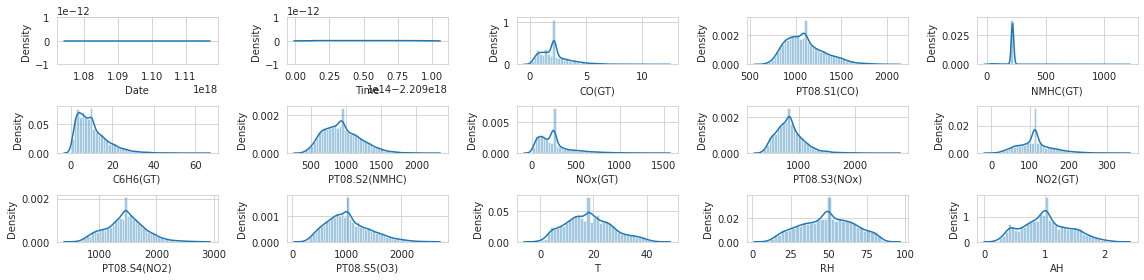

In [143]:
# Draw a distribution plot
rows = 3
cols = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (16,4))

col = air_quality.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot(air_quality[col[index]], ax=ax[i][j])
    index = index+1

plt.tight_layout()

In [144]:
air_quality2=air_quality.corr('pearson')
air_quality2

Date      Time    CO(GT)  ...         T        RH        AH
Date           1.000000 -0.003249  0.041514  ... -0.450032  0.212245 -0.310146
Time          -0.003249  1.000000  0.323944  ...  0.202272 -0.289543 -0.018233
CO(GT)         0.041514  0.323944  1.000000  ...  0.020257  0.043198  0.043274
PT08.S1(CO)   -0.003232  0.321097  0.773394  ...  0.048627  0.114606  0.135324
NMHC(GT)       0.008010  0.102758  0.289975  ...  0.066782 -0.052784  0.037173
C6H6(GT)      -0.064007  0.336890  0.812361  ...  0.198956 -0.061681  0.167972
PT08.S2(NMHC) -0.083633  0.380964  0.795578  ...  0.241373 -0.090380  0.186933
NOx(GT)        0.401280  0.200493  0.762273  ... -0.235636  0.192587 -0.126868
PT08.S3(NOx)  -0.251775 -0.316828 -0.613877  ... -0.145112 -0.056740 -0.232017
NO2(GT)        0.349315  0.327673  0.646349  ... -0.165466 -0.080569 -0.291392
PT08.S4(NO2)  -0.517637  0.216572  0.558232  ...  0.561270 -0.032188  0.629641
PT08.S5(O3)    0.103508  0.239880  0.759027  ... -0.027172  0.124956  0.070751
T             -0.450032  0.202272  0.020257  ...  1.000000 -0.578621  0.656397
RH             0.212245 -0.289543  0.043198  ... -0.578621  1.000000  0.167971
AH            -0.310146 -0.018233  0.043274  ...  0.656397  0.167971  1.000000

[15 rows x 15 columns]

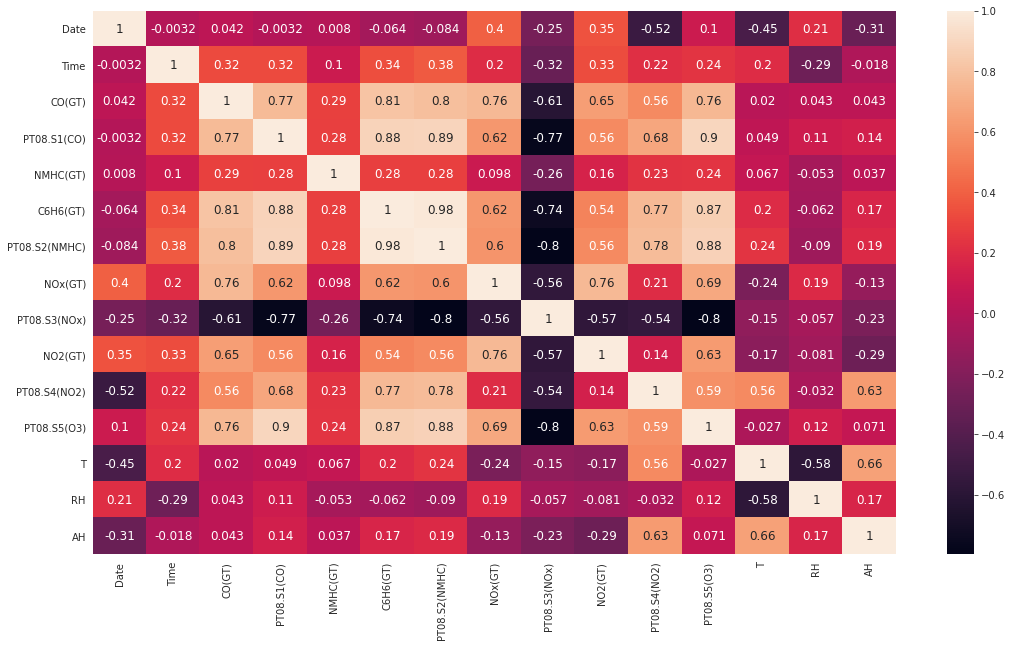

In [145]:
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(air_quality2,annot=True, annot_kws={'size': 12})

In [146]:
abs(air_quality2['T']).sort_values(ascending=False)

T                1.000000
AH               0.656397
RH               0.578621
PT08.S4(NO2)     0.561270
Date             0.450032
PT08.S2(NMHC)    0.241373
NOx(GT)          0.235636
Time             0.202272
C6H6(GT)         0.198956
NO2(GT)          0.165466
PT08.S3(NOx)     0.145112
NMHC(GT)         0.066782
PT08.S1(CO)      0.048627
PT08.S5(O3)      0.027172
CO(GT)           0.020257
Name: T, dtype: float64

In [147]:
def getCorrelatedFeature(corrdata, threshold):
  feature = []
  value = []
  for i, index in enumerate(corrdata.index):
    if abs(corrdata[index]) > threshold:
      feature.append(index)
      value.append(corrdata[index])

  df = pd.DataFrame(data=value, index=feature, columns=['Corr Feature'])
  return df

In [148]:
target = air_quality['T']

**Choose 50% greater correlated features**

In [149]:
threshold = 0.5
features = getCorrelatedFeature(air_quality2['T'], threshold)
features

Corr Feature
PT08.S4(NO2)      0.561270
T                 1.000000
RH               -0.578621
AH                0.656397

In [150]:
corr_data = air_quality[features.index]
corr_data.head()

PT08.S4(NO2)     T    RH      AH
0        1692.0  13.6  48.9  0.7578
1        1559.0  13.3  47.7  0.7255
2        1555.0  11.9  54.0  0.7502
3        1584.0  11.0  60.0  0.7867
4        1490.0  11.2  59.6  0.7888

<function matplotlib.pyplot.tight_layout>

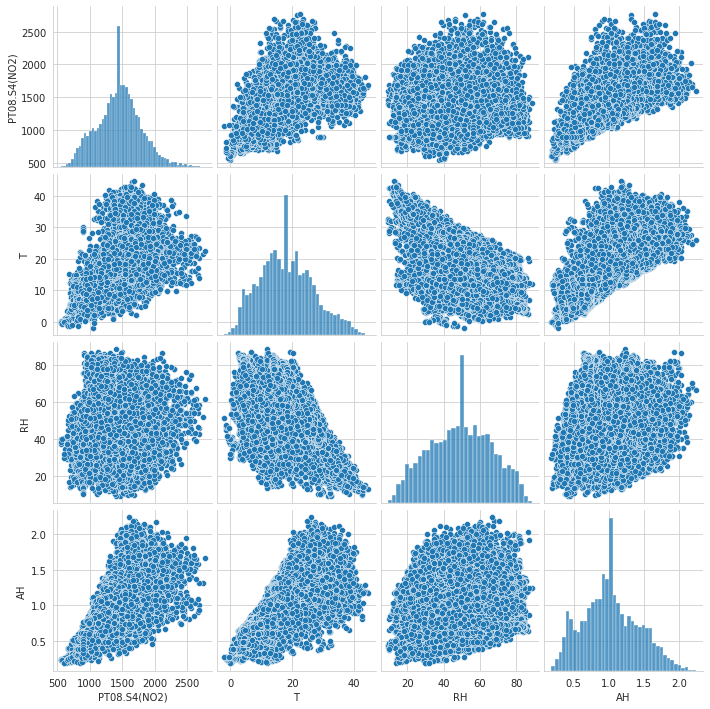

In [151]:
sns.pairplot(corr_data)
plt.tight_layout

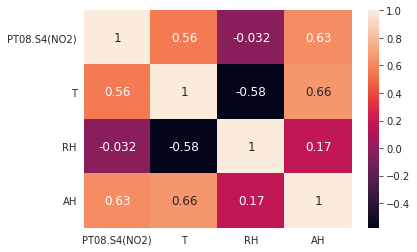

In [152]:
sns.heatmap(corr_data.corr(), annot=True, annot_kws={'size':12})

# **Splitting Dataset**

In [153]:
X = corr_data.drop(labels=['T'], axis=1)
y = corr_data['T']
X.head()

PT08.S4(NO2)    RH      AH
0        1692.0  48.9  0.7578
1        1559.0  47.7  0.7255
2        1555.0  54.0  0.7502
3        1584.0  60.0  0.7867
4        1490.0  59.6  0.7888

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [155]:
X_train.shape, X_test.shape

((7485, 3), (1872, 3))

# **Train Model**

In [156]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
y_predict = lm.predict(X_test)

In [158]:
result = pd.DataFrame(data=[y_predict, y_test], index=['predict_value', 'true_value'])
result.T

predict_value  true_value
0         18.795422   18.800000
1          9.254781    6.100000
2         21.329148   21.500000
3         19.646741   20.200000
4         12.367506   13.700000
...             ...         ...
1867      20.514281   21.200000
1868       8.509413    8.600000
1869      18.316053   18.317829
1870      10.683510   12.500000
1871      28.808128   31.600000

[1872 rows x 2 columns]

# **Perfomance Metrics**

**Coefficient of Determination, R2**

R2 range is from 0 to 1
if R2 = 0 then bad model 
and if R2 = 1 then good model 

In [159]:
r2_score_value = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [160]:
print("R2 score: " , r2_score_value)
print("MAE: " , mae)
print("MSE: " , mse)
print("rmse: " , rmse)

R2 score:  0.9218296784840774
MAE:  1.7741849710650013
MSE:  6.080389579507619
rmse:  2.4658445975988874


**Regression Plot**

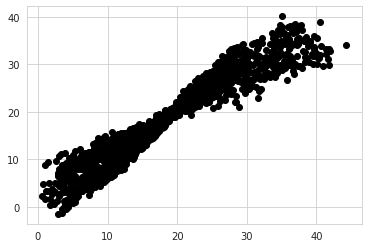

In [161]:
plt.scatter(y_test,y_predict,color='black')
plt.show()

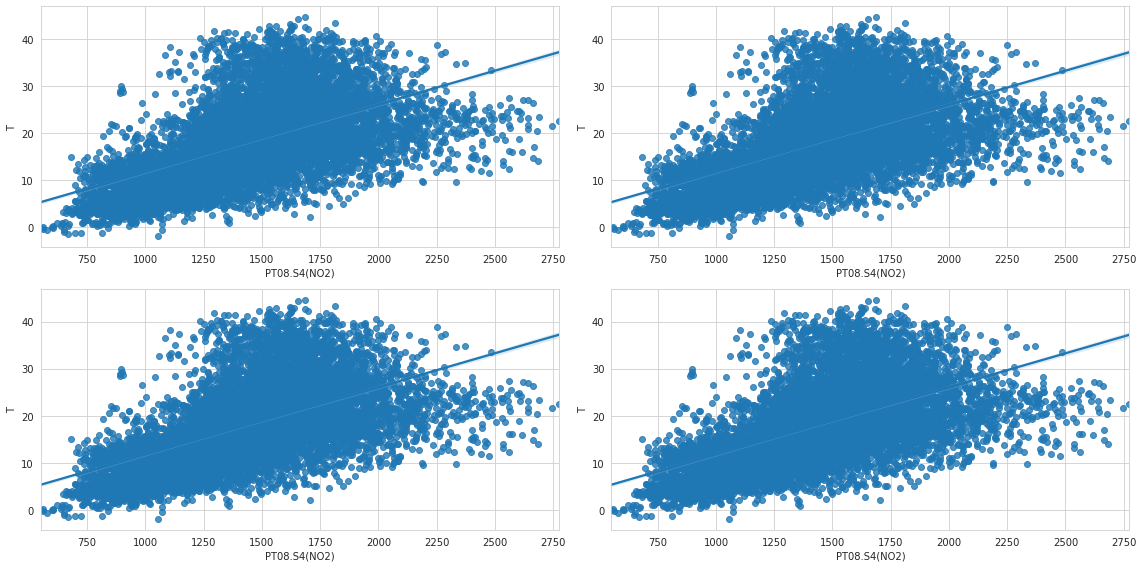

In [162]:
rows = 2
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,8))

col = corr_data.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.regplot(x = corr_data[col[index]], y = corr_data['T'], ax = ax[i][j])

fig.tight_layout()

# **Method to Store Feature Perfomance**

In [163]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_score_values = []
mae_values = []
mse_values = []
rmse_values = []

In [164]:
from sklearn import metrics

In [165]:
def perfomance_matrics(features, threshold, y_true, y_pred):
  r2_score = metrics.r2_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)

  total_features.append(len(features)-1)
  total_features_name.append(str(features))
  selected_correlation_value.append(threshold)
  r2_score_values.append(r2_score)
  mae_values.append(mae)
  mse_values.append(mse)
  rmse_values.append(rmse)

  metrics_dataframe = pd.DataFrame(data=[total_features_name, total_features, selected_correlation_value, r2_score_values, mae_values, mse_values, rmse_values],
                                   index=['feature_name', 'total_feature', 'corr_values', 'r2_score', 'mae', 'mse', 'rmse'])
  return metrics_dataframe.T

**Get value for threshold > 50%**

In [166]:
threshold = 0.50
perfomance_matrics(corr_data.columns.values, threshold, y_test, y_predict)

feature_name total_feature  ...      mse     rmse
0  ['PT08.S4(NO2)' 'T' 'RH' 'AH']             3  ...  6.08039  2.46584

[1 rows x 7 columns]

**Method to get y predict**

In [167]:
def get_y_predict(corr_data):
  X = corr_data.drop(labels = 'T', axis=1)
  y = corr_data['T']
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  return y_predict

**Get value for threshold > 60%**

In [168]:
threshold = 0.6
corr_value = getCorrelatedFeature(air_quality2['T'], threshold)
corr_value

Corr Feature
T       1.000000
AH      0.656397

In [169]:
corr_data = air_quality[corr_value.index]
corr_data.head()

T      AH
0  13.6  0.7578
1  13.3  0.7255
2  11.9  0.7502
3  11.0  0.7867
4  11.2  0.7888

In [170]:
y_predict = get_y_predict(corr_data)
perfomance_matrics(corr_data.columns.values, threshold, y_test, y_predict)

feature_name total_feature  ...      mse     rmse
0  ['PT08.S4(NO2)' 'T' 'RH' 'AH']             3  ...  6.08039  2.46584
1                      ['T' 'AH']             1  ...  45.0403  6.71121

[2 rows x 7 columns]

**Get value for threshold > 40%**

In [171]:
threshold = 0.4
corr_value = getCorrelatedFeature(air_quality2['T'], threshold)
corr_data = air_quality[corr_value.index]
y_predict = get_y_predict(corr_data)
perfomance_matrics(corr_data.columns.values, threshold, y_test, y_predict)

feature_name total_feature  ...      mse     rmse
0         ['PT08.S4(NO2)' 'T' 'RH' 'AH']             3  ...  6.08039  2.46584
1                             ['T' 'AH']             1  ...  45.0403  6.71121
2  ['Date' 'PT08.S4(NO2)' 'T' 'RH' 'AH']             4  ...  28.7254  5.35961

[3 rows x 7 columns]

**Get value for threshold > 20%**

In [172]:
threshold = 0.2
corr_value = getCorrelatedFeature(air_quality2['T'], threshold)
corr_data = air_quality[corr_value.index]
y_predict = get_y_predict(corr_data)
perfomance_matrics(corr_data.columns.values, threshold, y_test, y_predict)

feature_name  ...     rmse
0                     ['PT08.S4(NO2)' 'T' 'RH' 'AH']  ...  2.46584
1                                         ['T' 'AH']  ...  6.71121
2              ['Date' 'PT08.S4(NO2)' 'T' 'RH' 'AH']  ...  5.35961
3  ['Date' 'Time' 'PT08.S2(NMHC)' 'NOx(GT)' 'PT08...  ...    3.775

[4 rows x 7 columns]

**Get value for threshold > 10%**

In [173]:
threshold = 0.1
corr_value = getCorrelatedFeature(air_quality2['T'], threshold)
corr_data = air_quality[corr_value.index]
y_predict = get_y_predict(corr_data)
perfomance_matrics(corr_data.columns.values, threshold, y_test, y_predict)

feature_name  ...     rmse
0                     ['PT08.S4(NO2)' 'T' 'RH' 'AH']  ...  2.46584
1                                         ['T' 'AH']  ...  6.71121
2              ['Date' 'PT08.S4(NO2)' 'T' 'RH' 'AH']  ...  5.35961
3  ['Date' 'Time' 'PT08.S2(NMHC)' 'NOx(GT)' 'PT08...  ...    3.775
4  ['Date' 'Time' 'C6H6(GT)' 'PT08.S2(NMHC)' 'NOx...  ...  3.58277

[5 rows x 7 columns]

In [173]:
# So here 0.5 is provide better r2 score 